# Proyek Analisis Data: E-Commerce Public Dataset
- **Nama:** Nathan Adhitya
- **Email:** nathanadhitya@outlook.com
- **ID Dicoding:** nathanadhitya

## Menentukan Pertanyaan Bisnis

- What products categories are most sought after and least sought after in the last 90 days?
- How much do delivery times affect product reviews in the last 90 days?
- Where are the hot spots for order destinations in the last 90 days?

\* last 90 days: last 90 days of dataset



## Import Semua Packages/Library yang Digunakan

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import folium
from folium import plugins

## Data Wrangling

### Gathering Data

In [2]:
customers_df = pd.read_csv('dataset/customers_dataset.csv')
customers_df

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP
...,...,...,...,...,...
99436,17ddf5dd5d51696bb3d7c6291687be6f,1a29b476fee25c95fbafc67c5ac95cf8,3937,sao paulo,SP
99437,e7b71a9017aa05c9a7fd292d714858e8,d52a67c98be1cf6a5c84435bd38d095d,6764,taboao da serra,SP
99438,5e28dfe12db7fb50a4b2f691faecea5e,e9f50caf99f032f0bf3c55141f019d99,60115,fortaleza,CE
99439,56b18e2166679b8a959d72dd06da27f9,73c2643a0a458b49f58cea58833b192e,92120,canoas,RS


In [3]:
products_df = pd.read_csv('dataset/products_dataset.csv')
products_df

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0
...,...,...,...,...,...,...,...,...,...
32946,a0b7d5a992ccda646f2d34e418fff5a0,moveis_decoracao,45.0,67.0,2.0,12300.0,40.0,40.0,40.0
32947,bf4538d88321d0fd4412a93c974510e6,construcao_ferramentas_iluminacao,41.0,971.0,1.0,1700.0,16.0,19.0,16.0
32948,9a7c6041fa9592d9d9ef6cfe62a71f8c,cama_mesa_banho,50.0,799.0,1.0,1400.0,27.0,7.0,27.0
32949,83808703fc0706a22e264b9d75f04a2e,informatica_acessorios,60.0,156.0,2.0,700.0,31.0,13.0,20.0


In [4]:
orders_df = pd.read_csv('dataset/orders_dataset.csv')
orders_df

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00
...,...,...,...,...,...,...,...,...
99436,9c5dedf39a927c1b2549525ed64a053c,39bd1228ee8140590ac3aca26f2dfe00,delivered,2017-03-09 09:54:05,2017-03-09 09:54:05,2017-03-10 11:18:03,2017-03-17 15:08:01,2017-03-28 00:00:00
99437,63943bddc261676b46f01ca7ac2f7bd8,1fca14ff2861355f6e5f14306ff977a7,delivered,2018-02-06 12:58:58,2018-02-06 13:10:37,2018-02-07 23:22:42,2018-02-28 17:37:56,2018-03-02 00:00:00
99438,83c1379a015df1e13d02aae0204711ab,1aa71eb042121263aafbe80c1b562c9c,delivered,2017-08-27 14:46:43,2017-08-27 15:04:16,2017-08-28 20:52:26,2017-09-21 11:24:17,2017-09-27 00:00:00
99439,11c177c8e97725db2631073c19f07b62,b331b74b18dc79bcdf6532d51e1637c1,delivered,2018-01-08 21:28:27,2018-01-08 21:36:21,2018-01-12 15:35:03,2018-01-25 23:32:54,2018-02-15 00:00:00


In [5]:
order_reviews_df = pd.read_csv("dataset/order_reviews_dataset.csv")
order_reviews_df

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN,2018-01-18 00:00:00,2018-01-18 21:46:59
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,NaN,NaN,2018-03-10 00:00:00,2018-03-11 03:05:13
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,NaN,NaN,2018-02-17 00:00:00,2018-02-18 14:36:24
3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,NaN,Recebi bem antes do prazo estipulado.,2017-04-21 00:00:00,2017-04-21 22:02:06
4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,NaN,Parabéns lojas lannister adorei comprar pela I...,2018-03-01 00:00:00,2018-03-02 10:26:53
...,...,...,...,...,...,...,...
99219,574ed12dd733e5fa530cfd4bbf39d7c9,2a8c23fee101d4d5662fa670396eb8da,5,NaN,NaN,2018-07-07 00:00:00,2018-07-14 17:18:30
99220,f3897127253a9592a73be9bdfdf4ed7a,22ec9f0669f784db00fa86d035cf8602,5,NaN,NaN,2017-12-09 00:00:00,2017-12-11 20:06:42
99221,b3de70c89b1510c4cd3d0649fd302472,55d4004744368f5571d1f590031933e4,5,NaN,"Excelente mochila, entrega super rápida. Super...",2018-03-22 00:00:00,2018-03-23 09:10:43
99222,1adeb9d84d72fe4e337617733eb85149,7725825d039fc1f0ceb7635e3f7d9206,4,NaN,NaN,2018-07-01 00:00:00,2018-07-02 12:59:13


In [6]:
order_items_df = pd.read_csv('dataset/order_items_dataset.csv')
order_items_df

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14
...,...,...,...,...,...,...,...
112645,fffc94f6ce00a00581880bf54a75a037,1,4aa6014eceb682077f9dc4bffebc05b0,b8bc237ba3788b23da09c0f1f3a3288c,2018-05-02 04:11:01,299.99,43.41
112646,fffcd46ef2263f404302a634eb57f7eb,1,32e07fd915822b0765e448c4dd74c828,f3c38ab652836d21de61fb8314b69182,2018-07-20 04:31:48,350.00,36.53
112647,fffce4705a9662cd70adb13d4a31832d,1,72a30483855e2eafc67aee5dc2560482,c3cfdc648177fdbbbb35635a37472c53,2017-10-30 17:14:25,99.90,16.95
112648,fffe18544ffabc95dfada21779c9644f,1,9c422a519119dcad7575db5af1ba540e,2b3e4a2a3ea8e01938cabda2a3e5cc79,2017-08-21 00:04:32,55.99,8.72


In [7]:
order_payments_df = pd.read_csv('dataset/order_payments_dataset.csv')
order_payments_df

,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78
4,42fdf880ba16b47b59251dd489d4441a,1,credit_card,2,128.45
...,...,...,...,...,...
103881,0406037ad97740d563a178ecc7a2075c,1,boleto,1,363.31
103882,7b905861d7c825891d6347454ea7863f,1,credit_card,2,96.80
103883,32609bbb3dd69b3c066a6860554a77bf,1,credit_card,1,47.77
103884,b8b61059626efa996a60be9bb9320e10,1,credit_card,5,369.54


In [8]:
geolocation_df = pd.read_csv("dataset/geolocation_dataset.csv")
geolocation_df

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
0,1037,-23.545621,-46.639292,sao paulo,SP
1,1046,-23.546081,-46.644820,sao paulo,SP
2,1046,-23.546129,-46.642951,sao paulo,SP
3,1041,-23.544392,-46.639499,sao paulo,SP
4,1035,-23.541578,-46.641607,sao paulo,SP
...,...,...,...,...,...
1000158,99950,-28.068639,-52.010705,tapejara,RS
1000159,99900,-27.877125,-52.224882,getulio vargas,RS
1000160,99950,-28.071855,-52.014716,tapejara,RS
1000161,99980,-28.388932,-51.846871,david canabarro,RS


#### Insight:
- This section loads the data from the /dataset folder.
- The dataset does not seem to contain complete information, e.g. product name. Therefore, answering the questions would make most sense simply based on product category.
- Geolocation data is available based on customer's zip code prefix.

### Assessing Data

#### Menilai tabel `customers_df`

In [9]:
customers_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   customer_id               99441 non-null  object
 1   customer_unique_id        99441 non-null  object
 2   customer_zip_code_prefix  99441 non-null  int64 
 3   customer_city             99441 non-null  object
 4   customer_state            99441 non-null  object
dtypes: int64(1), object(4)
memory usage: 3.8+ MB


In [10]:
customers_df.isna().sum()

customer_id                 0
customer_unique_id          0
customer_zip_code_prefix    0
customer_city               0
customer_state              0
dtype: int64

In [11]:
customers_df.duplicated().sum()

0

In [12]:
customers_df.describe()

,customer_zip_code_prefix
count,99441.000000
mean,35137.474583
std,29797.938996
min,1003.000000
25%,11347.000000
50%,24416.000000
75%,58900.000000
max,99990.000000


#### Menilai tabel `products_df`

In [13]:
products_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32951 entries, 0 to 32950
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   product_id                  32951 non-null  object 
 1   product_category_name       32341 non-null  object 
 2   product_name_lenght         32341 non-null  float64
 3   product_description_lenght  32341 non-null  float64
 4   product_photos_qty          32341 non-null  float64
 5   product_weight_g            32949 non-null  float64
 6   product_length_cm           32949 non-null  float64
 7   product_height_cm           32949 non-null  float64
 8   product_width_cm            32949 non-null  float64
dtypes: float64(7), object(2)
memory usage: 2.3+ MB


In [14]:
products_df.isna().sum()

product_id                      0
product_category_name         610
product_name_lenght           610
product_description_lenght    610
product_photos_qty            610
product_weight_g                2
product_length_cm               2
product_height_cm               2
product_width_cm                2
dtype: int64

In [15]:
products_df.duplicated().sum()

0

In [16]:
products_df.describe()

,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
count,32341.000000,32341.000000,32341.000000,32949.000000,32949.000000,32949.000000,32949.000000
mean,48.476949,771.495285,2.188986,2276.472488,30.815078,16.937661,23.196728
std,10.245741,635.115225,1.736766,4282.038731,16.914458,13.637554,12.079047
min,5.000000,4.000000,1.000000,0.000000,7.000000,2.000000,6.000000
25%,42.000000,339.000000,1.000000,300.000000,18.000000,8.000000,15.000000
50%,51.000000,595.000000,1.000000,700.000000,25.000000,13.000000,20.000000
75%,57.000000,972.000000,3.000000,1900.000000,38.000000,21.000000,30.000000
max,76.000000,3992.000000,20.000000,40425.000000,105.000000,105.000000,118.000000


#### Menilai tabel `orders_df`

In [17]:
orders_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   order_id                       99441 non-null  object
 1   customer_id                    99441 non-null  object
 2   order_status                   99441 non-null  object
 3   order_purchase_timestamp       99441 non-null  object
 4   order_approved_at              99281 non-null  object
 5   order_delivered_carrier_date   97658 non-null  object
 6   order_delivered_customer_date  96476 non-null  object
 7   order_estimated_delivery_date  99441 non-null  object
dtypes: object(8)
memory usage: 6.1+ MB


In [18]:
orders_df.isna().sum()

order_id                            0
customer_id                         0
order_status                        0
order_purchase_timestamp            0
order_approved_at                 160
order_delivered_carrier_date     1783
order_delivered_customer_date    2965
order_estimated_delivery_date       0
dtype: int64

In [19]:
orders_df.duplicated().sum()

0

In [20]:
orders_df.describe()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
count,99441,99441,99441,99441,99281,97658,96476,99441
unique,99441,99441,8,98875,90733,81018,95664,459
top,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2018-04-11 10:48:14,2018-02-27 04:31:10,2018-05-09 15:48:00,2018-05-08 23:38:46,2017-12-20 00:00:00
freq,1,1,96478,3,9,47,3,522


#### Menilai tabel `order_items_df`

In [21]:
order_items_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   order_id             112650 non-null  object 
 1   order_item_id        112650 non-null  int64  
 2   product_id           112650 non-null  object 
 3   seller_id            112650 non-null  object 
 4   shipping_limit_date  112650 non-null  object 
 5   price                112650 non-null  float64
 6   freight_value        112650 non-null  float64
dtypes: float64(2), int64(1), object(4)
memory usage: 6.0+ MB


In [22]:
order_items_df.isna().sum()

order_id               0
order_item_id          0
product_id             0
seller_id              0
shipping_limit_date    0
price                  0
freight_value          0
dtype: int64

In [23]:
order_items_df.duplicated().sum()

0

#### Menilai tabel `order_reviews_df`

In [24]:
order_reviews_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99224 entries, 0 to 99223
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   review_id                99224 non-null  object
 1   order_id                 99224 non-null  object
 2   review_score             99224 non-null  int64 
 3   review_comment_title     11568 non-null  object
 4   review_comment_message   40977 non-null  object
 5   review_creation_date     99224 non-null  object
 6   review_answer_timestamp  99224 non-null  object
dtypes: int64(1), object(6)
memory usage: 5.3+ MB


In [25]:
order_reviews_df.isna().sum()

review_id                      0
order_id                       0
review_score                   0
review_comment_title       87656
review_comment_message     58247
review_creation_date           0
review_answer_timestamp        0
dtype: int64

In [26]:
order_reviews_df.duplicated().sum()

0

In [27]:
order_reviews_df.describe()

,review_score
count,99224.000000
mean,4.086421
std,1.347579
min,1.000000
25%,4.000000
50%,5.000000
75%,5.000000
max,5.000000


#### Menilai tabel `order_payments_df`

In [28]:
order_payments_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103886 entries, 0 to 103885
Data columns (total 5 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   order_id              103886 non-null  object 
 1   payment_sequential    103886 non-null  int64  
 2   payment_type          103886 non-null  object 
 3   payment_installments  103886 non-null  int64  
 4   payment_value         103886 non-null  float64
dtypes: float64(1), int64(2), object(2)
memory usage: 4.0+ MB


In [29]:
order_payments_df.isna().sum()

order_id                0
payment_sequential      0
payment_type            0
payment_installments    0
payment_value           0
dtype: int64

In [30]:
order_payments_df.duplicated().sum()

0

In [31]:
order_payments_df.describe()

,payment_sequential,payment_installments,payment_value
count,103886.000000,103886.000000,103886.000000
mean,1.092679,2.853349,154.100380
std,0.706584,2.687051,217.494064
min,1.000000,0.000000,0.000000
25%,1.000000,1.000000,56.790000
50%,1.000000,1.000000,100.000000
75%,1.000000,4.000000,171.837500
max,29.000000,24.000000,13664.080000


#### Menilai `geolocation_df`

In [32]:
geolocation_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000163 entries, 0 to 1000162
Data columns (total 5 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   geolocation_zip_code_prefix  1000163 non-null  int64  
 1   geolocation_lat              1000163 non-null  float64
 2   geolocation_lng              1000163 non-null  float64
 3   geolocation_city             1000163 non-null  object 
 4   geolocation_state            1000163 non-null  object 
dtypes: float64(2), int64(1), object(2)
memory usage: 38.2+ MB


In [33]:
geolocation_df.isna().sum()

geolocation_zip_code_prefix    0
geolocation_lat                0
geolocation_lng                0
geolocation_city               0
geolocation_state              0
dtype: int64

In [34]:
geolocation_df.duplicated().sum()

261831

In [35]:
geolocation_df.describe()

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng
count,1.000163e+06,1.000163e+06,1.000163e+06
mean,3.657417e+04,-2.117615e+01,-4.639054e+01
std,3.054934e+04,5.715866e+00,4.269748e+00
min,1.001000e+03,-3.660537e+01,-1.014668e+02
25%,1.107500e+04,-2.360355e+01,-4.857317e+01
50%,2.653000e+04,-2.291938e+01,-4.663788e+01
75%,6.350400e+04,-1.997962e+01,-4.376771e+01
max,9.999000e+04,4.506593e+01,1.211054e+02


#### Insight
- Duplicate data was only found for `geolocation_df`.
- 2 products have no size information.
- 610 products are missing category information and related information.
- `customers_df` seems to have pretty clean data.
- Many order reviews are missing review comments and titles, but that is not a problem for the questions asked.
- The order dataset contains orders which have not been approved, shipped, nor arrived.
- Some types for datetime are incorrect.

### Cleaning Data

#### Removing duplicates from `geolocation_df`

In [36]:
geolocation_df.drop_duplicates(inplace=True)
geolocation_df.duplicated().sum()

0

#### Fix date data types

In [37]:
time_pattern = "%Y-%m-%d %H:%M:%S"

orders_df["order_purchase_timestamp"] = pd.to_datetime(orders_df["order_purchase_timestamp"], format=time_pattern)
orders_df["order_approved_at"] = pd.to_datetime(orders_df["order_approved_at"], format=time_pattern)
orders_df["order_delivered_carrier_date"] = pd.to_datetime(orders_df["order_delivered_carrier_date"], format=time_pattern)
orders_df["order_delivered_customer_date"] = pd.to_datetime(orders_df["order_delivered_customer_date"], format=time_pattern)
orders_df["order_estimated_delivery_date"] = pd.to_datetime(orders_df["order_estimated_delivery_date"], format=time_pattern)

order_items_df["shipping_limit_date"] = pd.to_datetime(order_items_df["shipping_limit_date"], format=time_pattern)

order_reviews_df["review_creation_date"] = pd.to_datetime(order_reviews_df["review_creation_date"], format=time_pattern)
order_reviews_df["review_answer_timestamp"] = pd.to_datetime(order_reviews_df["review_answer_timestamp"], format=time_pattern)

In [38]:
orders_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   order_id                       99441 non-null  object        
 1   customer_id                    99441 non-null  object        
 2   order_status                   99441 non-null  object        
 3   order_purchase_timestamp       99441 non-null  datetime64[ns]
 4   order_approved_at              99281 non-null  datetime64[ns]
 5   order_delivered_carrier_date   97658 non-null  datetime64[ns]
 6   order_delivered_customer_date  96476 non-null  datetime64[ns]
 7   order_estimated_delivery_date  99441 non-null  datetime64[ns]
dtypes: datetime64[ns](5), object(3)
memory usage: 6.1+ MB


In [39]:
order_items_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype         
---  ------               --------------   -----         
 0   order_id             112650 non-null  object        
 1   order_item_id        112650 non-null  int64         
 2   product_id           112650 non-null  object        
 3   seller_id            112650 non-null  object        
 4   shipping_limit_date  112650 non-null  datetime64[ns]
 5   price                112650 non-null  float64       
 6   freight_value        112650 non-null  float64       
dtypes: datetime64[ns](1), float64(2), int64(1), object(3)
memory usage: 6.0+ MB


In [40]:
order_reviews_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99224 entries, 0 to 99223
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   review_id                99224 non-null  object        
 1   order_id                 99224 non-null  object        
 2   review_score             99224 non-null  int64         
 3   review_comment_title     11568 non-null  object        
 4   review_comment_message   40977 non-null  object        
 5   review_creation_date     99224 non-null  datetime64[ns]
 6   review_answer_timestamp  99224 non-null  datetime64[ns]
dtypes: datetime64[ns](2), int64(1), object(4)
memory usage: 5.3+ MB


#### Remove orders which have not been delivered nor arrived as it is not relevant to the questions asked.

In [41]:
orders_df.drop(orders_df[orders_df['order_status'] != 'delivered'].index, inplace=True)
orders_df.drop(orders_df[orders_df['order_delivered_customer_date'].isna()].index, inplace=True)

orders_df.isna().sum()

order_id                          0
customer_id                       0
order_status                      0
order_purchase_timestamp          0
order_approved_at                14
order_delivered_carrier_date      1
order_delivered_customer_date     0
order_estimated_delivery_date     0
dtype: int64

#### Insight:
- Further cleanup is not necessary as the data is already clean enough for the questions asked.

## Exploratory Data Analysis (EDA)

#### Explore `customers_df`

In [42]:
customers_df.sample(5)

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
12123,21558b7b6743818a6667a0bae27ad407,7f84cd18af38cea35e6427fd044e0931,2022,sao paulo,SP
22930,a08ac24c7188aae96f09570ffde66b40,c64d5429aa9d29059dcfa7d3d4c8193d,26700,mendes,RJ
56563,3e8e7112a59814fe7007bb864f3cd3cb,22f63e1a065edeea0b3c245bae439326,13420,piracicaba,SP
11838,f844205b357197a0a7a2f6937527d33b,3c5cc98c5d66e9df468a1149cea5db2f,13870,sao joao da boa vista,SP
43955,dc1ae63bd9c387114b602a80b70b20a7,7ab58593aedebc4e2ab6cc25d4e13205,55330,bom conselho,PE


In [43]:
customers_df.describe(include='all')

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
count,99441,99441,99441.000000,99441,99441
unique,99441,96096,NaN,4119,27
top,06b8999e2fba1a1fbc88172c00ba8bc7,8d50f5eadf50201ccdcedfb9e2ac8455,NaN,sao paulo,SP
freq,1,17,NaN,15540,41746
mean,NaN,NaN,35137.474583,NaN,NaN
std,NaN,NaN,29797.938996,NaN,NaN
min,NaN,NaN,1003.000000,NaN,NaN
25%,NaN,NaN,11347.000000,NaN,NaN
50%,NaN,NaN,24416.000000,NaN,NaN
75%,NaN,NaN,58900.000000,NaN,NaN


#### Explore `orders_df`

In [44]:
orders_df.sample(5)

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
41339,fc6e4c97f5307e9c1bc0797a45e40cbf,b195b30a0c289a41ee810335d3c06364,delivered,2018-03-14 17:57:56,2018-03-15 17:55:41,2018-03-16 21:10:51,2018-03-17 20:28:44,2018-03-26
62573,62a68781c6f891e4e7032cc4f0fede03,e1080516c2611434061a6043ae2ae9b1,delivered,2017-10-27 18:43:34,2017-10-31 12:32:10,2017-11-01 22:51:33,2017-11-06 23:21:14,2017-11-21
40109,7a778b7745be3f801b6bdbd8d54da6fe,8c6dd8d4c67aba9eeff1cc996a8bc737,delivered,2018-06-20 18:53:42,2018-06-20 19:18:53,2018-06-21 11:14:00,2018-06-25 22:35:20,2018-07-12
16206,809cadee53cde56e54180cf5d6631443,833cf609a6aec4b27901837d32aa7117,delivered,2017-12-15 11:38:53,2017-12-15 11:53:19,2017-12-20 11:13:48,2018-01-08 19:27:17,2018-01-17
36522,e6a66a8350bb88497954d37688ab123e,8db09297f613aa7c953b997e92b750db,delivered,2017-04-03 18:59:59,2017-04-03 19:15:11,2017-04-05 17:09:22,2017-04-10 11:12:46,2017-04-25


In [45]:
orders_df.describe(include='all')

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
count,96470,96470,96470,96470,96456,96469,96470,96470
unique,96470,96470,1,NaN,NaN,NaN,NaN,NaN
top,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,NaN,NaN,NaN,NaN,NaN
freq,1,1,96470,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,2018-01-01 23:17:43.624411648,2018-01-02 10:41:38.246329856,2018-01-05 04:46:44.911992320,2018-01-14 12:41:33.581683456,2018-01-25 16:58:03.644656640
min,NaN,NaN,NaN,2016-09-15 12:16:38,2016-09-15 12:16:38,2016-10-08 10:34:01,2016-10-11 13:46:32,2016-10-04 00:00:00
25%,NaN,NaN,NaN,2017-09-14 08:56:46.500000,2017-09-14 14:43:49,2017-09-18 16:42:10,2017-09-25 22:15:09.500000,2017-10-05 00:00:00
50%,NaN,NaN,NaN,2018-01-20 19:34:43.500000,2018-01-22 13:49:23.500000,2018-01-24 16:03:24,2018-02-02 19:32:21,2018-02-16 00:00:00
75%,NaN,NaN,NaN,2018-05-05 18:29:50.249999872,2018-05-06 10:52:55.750000128,2018-05-08 14:32:00,2018-05-15 22:54:48.500000,2018-05-28 00:00:00
max,NaN,NaN,NaN,2018-08-29 15:00:37,2018-08-29 15:10:26,2018-09-11 19:48:28,2018-10-17 13:22:46,2018-10-25 00:00:00


#### Explore `products_df`

In [46]:
products_df.sample(5)

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
16454,19290ebcf78e385cd9fcd48ce5e1393d,ferramentas_jardim,41.0,320.0,1.0,267.0,27.0,13.0,17.0
23678,f7812bf540cb401d6419be55d3b68ce3,esporte_lazer,53.0,1069.0,3.0,25700.0,80.0,85.0,20.0
27045,6978fe95a5bf7452bfef0fee43f55ce8,automotivo,51.0,176.0,2.0,767.0,15.0,5.0,10.0
20040,78e4f0bfb0f64274be5b054164c602ed,beleza_saude,50.0,585.0,2.0,1500.0,30.0,12.0,27.0
8926,2c41d13dc2cf0e9c2e8db8952f0f3ff3,informatica_acessorios,45.0,802.0,1.0,1100.0,31.0,12.0,11.0


In [47]:
products_df.describe(include='all')

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
count,32951,32341,32341.000000,32341.000000,32341.000000,32949.000000,32949.000000,32949.000000,32949.000000
unique,32951,73,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,1e9e8ef04dbcff4541ed26657ea517e5,cama_mesa_banho,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,1,3029,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,48.476949,771.495285,2.188986,2276.472488,30.815078,16.937661,23.196728
std,NaN,NaN,10.245741,635.115225,1.736766,4282.038731,16.914458,13.637554,12.079047
min,NaN,NaN,5.000000,4.000000,1.000000,0.000000,7.000000,2.000000,6.000000
25%,NaN,NaN,42.000000,339.000000,1.000000,300.000000,18.000000,8.000000,15.000000
50%,NaN,NaN,51.000000,595.000000,1.000000,700.000000,25.000000,13.000000,20.000000
75%,NaN,NaN,57.000000,972.000000,3.000000,1900.000000,38.000000,21.000000,30.000000


#### Explore `products_df` and `order_items_df` together

In [48]:
products_order_items_df = pd.merge(
    products_df, 
    order_items_df, 
    on='product_id', 
    how='left'
)

products_order_items_df.head()

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,order_id,order_item_id,seller_id,shipping_limit_date,price,freight_value
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0,e17e4f88e31525f7deef66779844ddce,1,5670f4db5b62c43d542e1b2d56b0cf7c,2018-04-30 17:33:54,10.91,7.39
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0,5236307716393b7114b53ee991f36956,1,b561927807645834b59ef0d16ba55a24,2018-02-06 19:11:15,248.00,17.99
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0,01f66e58769f84129811d43eefd187fb,1,7b07b3c7487f0ea825fc6df75abd658b,2018-07-11 21:30:20,79.80,7.82
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0,143d00a4f2dde4e0364ee1821577adb3,1,c510bc1718f0f2961eaa42a23330681a,2018-08-07 09:10:13,112.30,9.54
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0,86cafb8794cb99a9b1b77fc8e48fbbbb,1,0be8ff43f22e456b4e0371b2245e4d01,2018-04-17 01:30:23,37.90,8.29


#### Explore `orders_df`, `customers_df`, and `geolocation_df` together

In [49]:
customer_orders_df = pd.merge(customers_df, orders_df, on='customer_id')
customer_orders_df.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,00e7ee1b050b8499577073aeb2a297a1,delivered,2017-05-16 15:05:35,2017-05-16 15:22:12,2017-05-23 10:47:57,2017-05-25 10:35:35,2017-06-05
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP,29150127e6685892b6eab3eec79f59c7,delivered,2018-01-12 20:48:24,2018-01-12 20:58:32,2018-01-15 17:14:59,2018-01-29 12:41:19,2018-02-06
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP,b2059ed67ce144a36e2aa97d2c9e9ad2,delivered,2018-05-19 16:07:45,2018-05-20 16:19:10,2018-06-11 14:31:00,2018-06-14 17:58:51,2018-06-13
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP,951670f92359f4fe4a63112aa7306eba,delivered,2018-03-13 16:06:38,2018-03-13 17:29:19,2018-03-27 23:22:42,2018-03-28 16:04:25,2018-04-10
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP,6b7d50bd145f6fc7f33cebabd7e49d0f,delivered,2018-07-29 09:51:30,2018-07-29 10:10:09,2018-07-30 15:16:00,2018-08-09 20:55:48,2018-08-15


In [50]:
customer_order_geolocation_df = (pd
    .merge(
        customer_orders_df, 
        geolocation_df, 
        left_on='customer_zip_code_prefix', 
        right_on='geolocation_zip_code_prefix',
    )
)

customer_order_geolocation_df.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,00e7ee1b050b8499577073aeb2a297a1,delivered,2017-05-16 15:05:35,2017-05-16 15:22:12,2017-05-23 10:47:57,2017-05-25 10:35:35,2017-06-05,14409,-20.509897,-47.397866,franca,SP
1,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,00e7ee1b050b8499577073aeb2a297a1,delivered,2017-05-16 15:05:35,2017-05-16 15:22:12,2017-05-23 10:47:57,2017-05-25 10:35:35,2017-06-05,14409,-20.497396,-47.399241,franca,SP
2,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,00e7ee1b050b8499577073aeb2a297a1,delivered,2017-05-16 15:05:35,2017-05-16 15:22:12,2017-05-23 10:47:57,2017-05-25 10:35:35,2017-06-05,14409,-20.510459,-47.399553,franca,SP
3,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,00e7ee1b050b8499577073aeb2a297a1,delivered,2017-05-16 15:05:35,2017-05-16 15:22:12,2017-05-23 10:47:57,2017-05-25 10:35:35,2017-06-05,14409,-20.480940,-47.394161,franca,SP
4,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,00e7ee1b050b8499577073aeb2a297a1,delivered,2017-05-16 15:05:35,2017-05-16 15:22:12,2017-05-23 10:47:57,2017-05-25 10:35:35,2017-06-05,14409,-20.515413,-47.398194,franca,SP


#### Explore `orders_df` and `order_reviews_df` together

In [51]:
orders_order_reviews_df = pd.merge(
    orders_df,
    order_reviews_df,
    on="order_id",
    how="left"
)

orders_order_reviews_df.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,review_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,a54f0611adc9ed256b57ede6b6eb5114,4.0,NaN,"Não testei o produto ainda, mas ele veio corre...",2017-10-11,2017-10-12 03:43:48
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13,8d5266042046a06655c8db133d120ba5,4.0,Muito boa a loja,Muito bom o produto.,2018-08-08,2018-08-08 18:37:50
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04,e73b67b67587f7644d5bd1a52deb1b01,5.0,NaN,NaN,2018-08-18,2018-08-22 19:07:58
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15,359d03e676b3c069f62cadba8dd3f6e8,5.0,NaN,O produto foi exatamente o que eu esperava e e...,2017-12-03,2017-12-05 19:21:58
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26,e50934924e227544ba8246aeb3770dd4,5.0,NaN,NaN,2018-02-17,2018-02-18 13:02:51


#### Explore `orders_df` and `order_payments_df` together

In [52]:
orders_order_payments_df = pd.merge(orders_df, order_payments_df, on='order_id', how='left')
orders_order_payments_df.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,payment_sequential,payment_type,payment_installments,payment_value
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,1.0,credit_card,1.0,18.12
1,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,3.0,voucher,1.0,2.00
2,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,2.0,voucher,1.0,18.59
3,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13,1.0,boleto,1.0,141.46
4,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04,1.0,credit_card,3.0,179.12


#### Explore `orders_order_payments_df` with `customers_df`

In [53]:
# this naming scheme is getting ridiculous
customers_orders_order_payments_df = pd.merge(
    customers_df,
    orders_order_payments_df,
    on="customer_id",
    how="left",
    suffixes=("_customer", "_order"),
)
customers_orders_order_payments_df.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,payment_sequential,payment_type,payment_installments,payment_value
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,00e7ee1b050b8499577073aeb2a297a1,delivered,2017-05-16 15:05:35,2017-05-16 15:22:12,2017-05-23 10:47:57,2017-05-25 10:35:35,2017-06-05,1.0,credit_card,2.0,146.87
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP,29150127e6685892b6eab3eec79f59c7,delivered,2018-01-12 20:48:24,2018-01-12 20:58:32,2018-01-15 17:14:59,2018-01-29 12:41:19,2018-02-06,1.0,credit_card,8.0,335.48
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP,b2059ed67ce144a36e2aa97d2c9e9ad2,delivered,2018-05-19 16:07:45,2018-05-20 16:19:10,2018-06-11 14:31:00,2018-06-14 17:58:51,2018-06-13,1.0,credit_card,7.0,157.73
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP,951670f92359f4fe4a63112aa7306eba,delivered,2018-03-13 16:06:38,2018-03-13 17:29:19,2018-03-27 23:22:42,2018-03-28 16:04:25,2018-04-10,1.0,credit_card,1.0,173.30
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP,6b7d50bd145f6fc7f33cebabd7e49d0f,delivered,2018-07-29 09:51:30,2018-07-29 10:10:09,2018-07-30 15:16:00,2018-08-09 20:55:48,2018-08-15,1.0,credit_card,8.0,252.25


#### Explore `products_order_items_df` with `orders_df`

In [54]:
complete_order_df = pd.merge(
    products_order_items_df,
    orders_df,
    on="order_id",
)

complete_order_df.head()

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,order_id,...,shipping_limit_date,price,freight_value,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0,e17e4f88e31525f7deef66779844ddce,...,2018-04-30 17:33:54,10.91,7.39,f8a3e963a310aa58b60a5b1fed5bceb5,delivered,2018-04-24 16:16:53,2018-04-24 19:04:19,2018-04-25 17:01:00,2018-04-27 16:42:17,2018-05-09
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0,5236307716393b7114b53ee991f36956,...,2018-02-06 19:11:15,248.00,17.99,03fc97548af8f58fefc768d12b546c9c,delivered,2018-01-31 18:55:36,2018-01-31 19:11:15,2018-02-05 22:44:47,2018-02-16 13:27:08,2018-02-22
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0,01f66e58769f84129811d43eefd187fb,...,2018-07-11 21:30:20,79.80,7.82,e41819d1c95c12c9ce495b630eab8aee,delivered,2018-07-09 21:18:01,2018-07-09 21:30:20,2018-07-10 11:49:00,2018-07-11 23:24:16,2018-07-18
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0,143d00a4f2dde4e0364ee1821577adb3,...,2018-08-07 09:10:13,112.30,9.54,322162b5ca010c2b059cb5224dd818b1,delivered,2018-08-03 08:55:50,2018-08-03 09:31:42,2018-08-03 11:48:00,2018-08-06 15:14:32,2018-08-08
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0,86cafb8794cb99a9b1b77fc8e48fbbbb,...,2018-04-17 01:30:23,37.90,8.29,c11c31965ff02cc1d7132df8edfcbc22,delivered,2018-04-11 01:06:37,2018-04-11 01:30:23,2018-04-12 22:56:27,2018-04-13 22:41:44,2018-04-26


#### Insight:
- Many of the data are detached/in separate datasets.
- To answer the business questions, combining the datasets are necessary.
- Products and categories most sought after --> explore product and their orders, which needs combining `products_df` and `order_items_df.
- Delivery times and product reviews --> explore orders and their reviews, which needs combining `orders_df` and `order_reviews_df`.
- Hot spots for order destinations --> explore orders and their destinations, which needs combining `orders_df`, `customers_df`, and `geolocation_df`.

## Visualization & Explanatory Analysis

### Pertanyaan 1: What products categories are most sought after and least sought after in the last 90 days?

In [55]:
# Find date start range from the data
last_purchase_date = orders_df.agg({'order_purchase_timestamp': 'max'})
start_date_filter = last_purchase_date.iloc[0] - pd.Timedelta(days=90)

start_date_filter

Timestamp('2018-05-31 15:00:37')

In [56]:
orders_last_90d_df = complete_order_df[complete_order_df['order_purchase_timestamp'] > start_date_filter]
orders_last_90d_df.head()

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,order_id,...,shipping_limit_date,price,freight_value,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0,01f66e58769f84129811d43eefd187fb,...,2018-07-11 21:30:20,79.80,7.82,e41819d1c95c12c9ce495b630eab8aee,delivered,2018-07-09 21:18:01,2018-07-09 21:30:20,2018-07-10 11:49:00,2018-07-11 23:24:16,2018-07-18
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0,143d00a4f2dde4e0364ee1821577adb3,...,2018-08-07 09:10:13,112.30,9.54,322162b5ca010c2b059cb5224dd818b1,delivered,2018-08-03 08:55:50,2018-08-03 09:31:42,2018-08-03 11:48:00,2018-08-06 15:14:32,2018-08-08
21,14aa47b7fe5c25522b47b4b29c98dcb9,cama_mesa_banho,54.0,630.0,1.0,1100.0,16.0,10.0,16.0,47367d800613791c119ec33ee79cd9f0,...,2018-06-08 17:31:20,71.99,14.59,212910421824dc61368dd3c1b82c0fce,delivered,2018-05-31 17:07:48,2018-05-31 17:32:59,2018-06-04 12:58:00,2018-06-11 14:32:24,2018-07-04
22,14aa47b7fe5c25522b47b4b29c98dcb9,cama_mesa_banho,54.0,630.0,1.0,1100.0,16.0,10.0,16.0,f544502f7cd11a14cdc792d87c7795d5,...,2018-08-08 15:30:17,71.99,23.30,c2c015c222df129ec56095380b34a3f0,delivered,2018-08-06 15:14:00,2018-08-06 15:30:17,2018-08-09 12:14:00,2018-08-16 18:24:44,2018-08-17
24,03b63c5fc16691530586ae020c345514,bebes,49.0,728.0,4.0,7150.0,50.0,19.0,45.0,345f6867e8f97e11fb9f1ac091b18df9,...,2018-06-15 15:31:07,239.00,42.43,5c709e33ab03b8d9c3cd73f227323e29,delivered,2018-06-04 15:08:42,2018-06-04 15:31:41,2018-06-05 13:24:00,2018-06-18 15:46:22,2018-07-27


In [57]:
sum_order_items_df = (orders_last_90d_df
    .groupby('product_category_name')
    .agg({
        'product_id': 'count',
    })
    .rename(columns={'product_id': 'sold_count'})
)
sum_order_items_df.sort_values('sold_count', ascending=False, inplace=True)
sum_order_items_df.head()

,sold_count
product_category_name,
beleza_saude,2489
cama_mesa_banho,2046
utilidades_domesticas,1764
relogios_presentes,1419
esporte_lazer,1355


In [58]:
sum_order_items_df.tail()

,sold_count
product_category_name,
fashion_roupa_feminina,3
moveis_colchao_e_estofado,1
tablets_impressao_imagem,1
fashion_esporte,1
fashion_roupa_infanto_juvenil,1


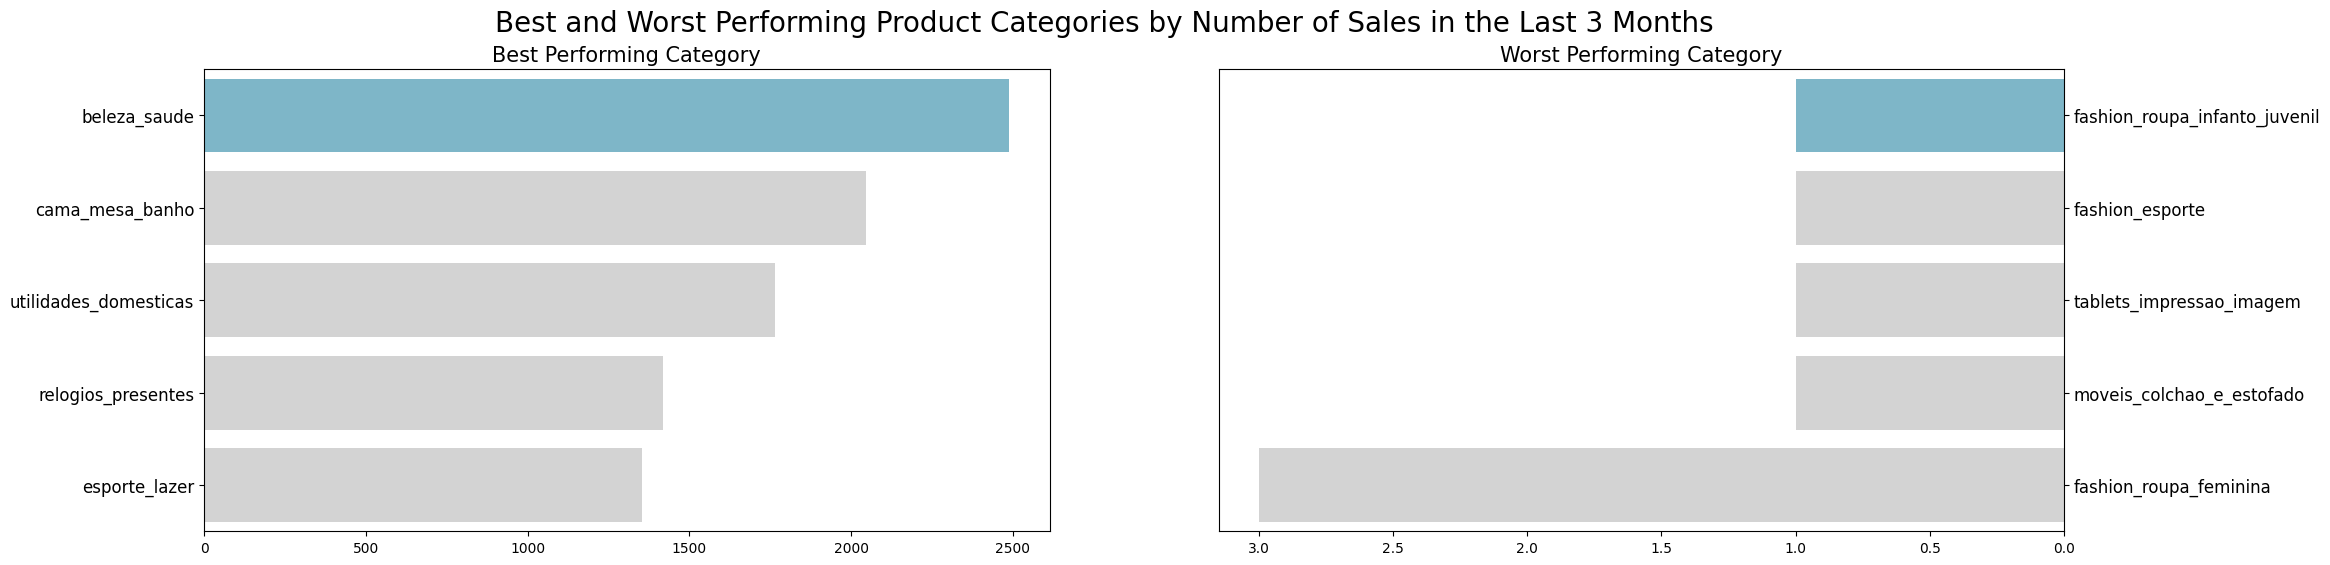

In [59]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(24, 6))
colors = ["#72BCD4", "#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3"]

sns.barplot(x="sold_count", y="product_category_name", hue="product_category_name", data=sum_order_items_df.head(5), palette=colors, ax=ax[0])
ax[0].set_ylabel(None)
ax[0].set_xlabel(None)
ax[0].set_title("Best Performing Category", loc="center", fontsize=15)
ax[0].tick_params(axis ='y', labelsize=12)
 
sns.barplot(x="sold_count", y="product_category_name", hue="product_category_name", data=sum_order_items_df.tail(5)[::-1], palette=colors, ax=ax[1])
ax[1].set_ylabel(None)
ax[1].set_xlabel(None)
ax[1].invert_xaxis()
ax[1].yaxis.set_label_position("right")
ax[1].yaxis.tick_right()
ax[1].set_title("Worst Performing Category", loc="center", fontsize=15)
ax[1].tick_params(axis='y', labelsize=12)
 
plt.suptitle("Best and Worst Performing Product Categories by Number of Sales in the Last 3 Months", fontsize=20)
plt.show()

### Pertanyaan 2: How much do delivery times affect product reviews in the last 90 days?

In [60]:
# Reuse the start_date_filter from the previous question
start_date_filter

Timestamp('2018-05-31 15:00:37')

In [61]:
order_reviews_last_90d_df = orders_order_reviews_df[orders_order_reviews_df['order_purchase_timestamp'] > start_date_filter]

# Filter only those with review score
order_reviews_last_90d_df = order_reviews_last_90d_df[order_reviews_last_90d_df['review_score'].notna()]

order_reviews_last_90d_df.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,review_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13,8d5266042046a06655c8db133d120ba5,4.0,Muito boa a loja,Muito bom o produto.,2018-08-08,2018-08-08 18:37:50
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04,e73b67b67587f7644d5bd1a52deb1b01,5.0,NaN,NaN,2018-08-18,2018-08-22 19:07:58
11,82566a660a982b15fb86e904c8d32918,d3e3b74c766bc6214e0c830b17ee2341,delivered,2018-06-07 10:06:19,2018-06-09 03:13:12,2018-06-11 13:29:00,2018-06-19 12:05:52,2018-07-18,ed220e853e96b629118a3576e02900b6,5.0,NaN,NaN,2018-06-20,2018-06-20 15:31:29
12,5ff96c15d0b717ac6ad1f3d77225a350,19402a48fe860416adf93348aba37740,delivered,2018-07-25 17:44:10,2018-07-25 17:55:14,2018-07-26 13:16:00,2018-07-30 15:52:25,2018-08-08,346e42116863ea64d51cef464d8f0c9c,5.0,NaN,NaN,2018-07-31,2018-08-02 21:15:12
14,dcb36b511fcac050b97cd5c05de84dc3,3b6828a50ffe546942b7a473d70ac0fc,delivered,2018-06-07 19:03:12,2018-06-12 23:31:02,2018-06-11 14:54:00,2018-06-21 15:34:32,2018-07-04,5a8608437f4b52bec5cd143f37258b5e,5.0,Nota dez,Obrigado pela atenção. Lojas lannister perfeit...,2018-07-03,2018-07-03 15:10:07


In [62]:
order_delivery_time_and_review_df = order_reviews_last_90d_df[["order_purchase_timestamp","order_delivered_customer_date","review_score"]]
order_delivery_time_and_review_df["time_between_purchase_and_delivery_days"] = (order_delivery_time_and_review_df["order_delivered_customer_date"] - order_delivery_time_and_review_df["order_purchase_timestamp"]).dt.days

order_delivery_time_and_review_df.head()

C:\Users\Nathan Adhitya\AppData\Local\Temp\ipykernel_61256\827194251.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  order_delivery_time_and_review_df["time_between_purchase_and_delivery_days"] = (order_delivery_time_and_review_df["order_delivered_customer_date"] - order_delivery_time_and_review_df["order_purchase_timestamp"]).dt.days


,order_purchase_timestamp,order_delivered_customer_date,review_score,time_between_purchase_and_delivery_days
1,2018-07-24 20:41:37,2018-08-07 15:27:45,4.0,13
2,2018-08-08 08:38:49,2018-08-17 18:06:29,5.0,9
11,2018-06-07 10:06:19,2018-06-19 12:05:52,5.0,12
12,2018-07-25 17:44:10,2018-07-30 15:52:25,5.0,4
14,2018-06-07 19:03:12,2018-06-21 15:34:32,5.0,13


In [63]:
order_delivery_time_and_review_df.corr()

,order_purchase_timestamp,order_delivered_customer_date,review_score,time_between_purchase_and_delivery_days
order_purchase_timestamp,1.000000,0.972868,0.012137,-0.139959
order_delivered_customer_date,0.972868,1.000000,-0.032291,0.092568
review_score,0.012137,-0.032291,1.000000,-0.190113
time_between_purchase_and_delivery_days,-0.139959,0.092568,-0.190113,1.000000


In [64]:
# Average out the data
average_delivery_and_review = (
    order_delivery_time_and_review_df
        .groupby(["time_between_purchase_and_delivery_days"])
        .agg({"review_score": "mean"})
).reset_index()


average_delivery_and_review.head()

,time_between_purchase_and_delivery_days,review_score
0,0,3.666667
1,1,4.523726
2,2,4.453125
3,3,4.495955
4,4,4.438329


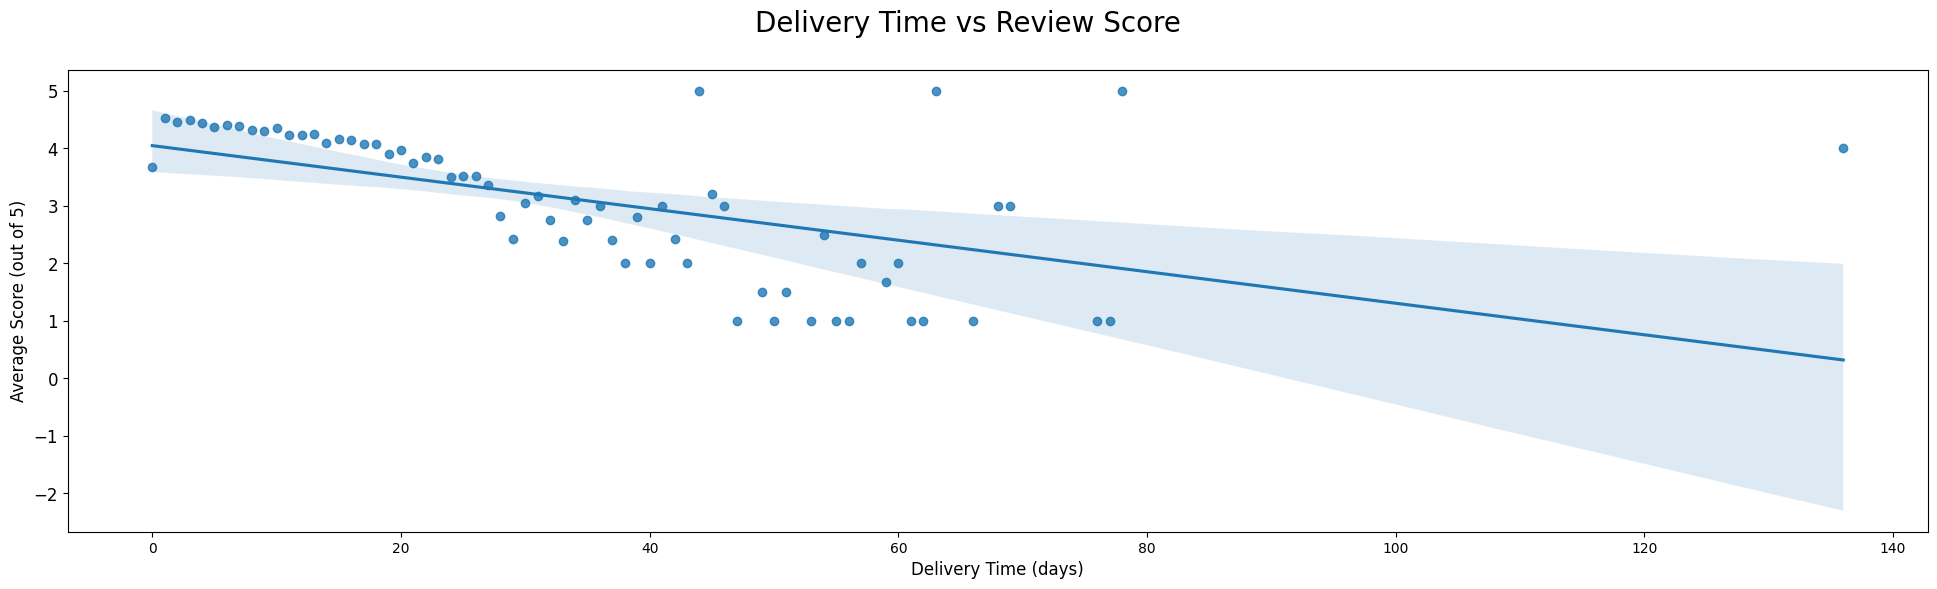

In [65]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(24, 6))
colors = ["#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3", "#72BCD4"]

sns.regplot(x="time_between_purchase_and_delivery_days", y="review_score", data=average_delivery_and_review, ax=ax)
ax.set_ylabel("Average Score (out of 5)", fontsize=12)
ax.set_xlabel("Delivery Time (days)", fontsize=12)
ax.tick_params(axis ='y', labelsize=12)
 
 
plt.suptitle("Delivery Time vs Review Score", fontsize=20)
plt.show()

### Insight:
- beleza_saude is the most sought after product category in the last 90 days. While moveis_colchao_e_estofado, tablets_impressao_imagem, fashion_esporte, fashion_roupa_infanto_juvenil is the least sought after.
- Delivery time has a weak negative correlation towards review score. The longer the delivery time, the lower the average review score to a certain extent.

## Analisis Lanjutan

### Geospatial Analysis: Where are the hot spots for order destinations in the last 90 days?
Teknik analisis ini digunakan untuk mengetahui lokasi pemesan yang paling banyak dalam 90 hari terakhir. Teknik yang digunakan adalah dengan mengubah data geolocation customer menjadi heatmap. Data heatmap ini digunakan untuk menentukan lokasi pemesan terbesar dalam 90 hari terakhir.

In [66]:
# Reuse the start_date_filter from the previous question
start_date_filter

Timestamp('2018-05-31 15:00:37')

In [67]:
# Filter from last 90 days
customer_order_geolocation_last_90d_df = customer_order_geolocation_df[customer_order_geolocation_df['order_purchase_timestamp'] > start_date_filter]

# Sample 5000 to improve performance
customer_order_geolocation_last_90d_df = customer_order_geolocation_last_90d_df.sample(n=5000)

customer_order_geolocation_last_90d_df.head()

customer_order_geolocation_last_90d_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5000 entries, 1075279 to 3747670
Data columns (total 17 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   customer_id                    5000 non-null   object        
 1   customer_unique_id             5000 non-null   object        
 2   customer_zip_code_prefix       5000 non-null   int64         
 3   customer_city                  5000 non-null   object        
 4   customer_state                 5000 non-null   object        
 5   order_id                       5000 non-null   object        
 6   order_status                   5000 non-null   object        
 7   order_purchase_timestamp       5000 non-null   datetime64[ns]
 8   order_approved_at              5000 non-null   datetime64[ns]
 9   order_delivered_carrier_date   5000 non-null   datetime64[ns]
 10  order_delivered_customer_date  5000 non-null   datetime64[ns]
 11  order_estimat

In [68]:
# Find center lng, lat
centered_point = customer_order_geolocation_last_90d_df.agg({"geolocation_lat": "mean", "geolocation_lng": "mean"})
centered_point.to_list()

[-21.846181046898053, -46.27149713903194]

In [69]:
#heat_data = [[point.xy[1][0], point.xy[0][0]] for point in geo_df.geometry] 
heat_data = customer_order_geolocation_last_90d_df[["geolocation_lat", "geolocation_lng"]].values.tolist()
heat_data[:5]

[[-22.93020282765874, -43.07115204619434],
 [-19.836911084655743, -43.88993488703906],
 [-23.98479796586644, -46.3074320173409],
 [-9.418857823317325, -40.49900005835711],
 [-13.362554123790822, -39.07530479723097]]

In [70]:
folium_map = folium.Map(location=centered_point.to_list(), tiles="OpenStreetMap", zoom_start=7)

plugins.HeatMap(heat_data).add_to(folium_map)
folium_map

#### Insight:
- A rough view of the map indicates that orders are concentrated in 2 major areas: Rio de Janeiro and Sao Paulo.
- An attempt was made to display all of the data on the map, but performance was horrible, therefore I decided to simply sample the data.

## Conclusion

#### What products categories are most sought after and least sought after in the last 90 days?
beleza_saude is the most sought after product category in the last 90 days. While moveis_colchao_e_estofado, tablets_impressao_imagem, fashion_esporte, fashion_roupa_infanto_juvenil is the least sought after.

#### How much do delivery times affect product reviews in the last 90 days?
Delivery time has a weak negative correlation towards review score. The longer the delivery time, the lower the average review score to a certain extent.

#### Where are the hot spots for order destinations in the last 90 days?
Order destinations are concentrated in 2 major areas: Rio de Janeiro and Sao Paulo.

## Prepare data for dashboard

In [74]:
complete_order_df[["order_purchase_timestamp", "product_category_name", "product_id"]].to_csv("dashboard/complete_order_df.csv", index=False)
orders_order_reviews_df[["order_purchase_timestamp", "order_delivered_customer_date", "review_score"]].to_csv("dashboard/orders_order_reviews_df.csv", index=False)

# This results in smaller sizes when joining on streamlit dashboard. apparently the naive method would result into a 2GB+ file.
customers_df[["customer_id", "customer_zip_code_prefix"]].to_csv("dashboard/geo_customer.csv", index=False)
geolocation_df[["geolocation_zip_code_prefix", "geolocation_lat", "geolocation_lng"]].to_csv("dashboard/geo_df.csv", index=False)
orders_df[["order_id", "order_purchase_timestamp", "customer_id"]].to_csv("dashboard/geo_orders.csv", index=False)